# Visualizing Ford GoBike  
### by Merve Yalcinkaya


## Investigation Overview

* When are most trips taken in terms of time of day and day of the week?

* How long does the average trip take?

* Does the above depend on if a user is a subscriber or customer?

* Does the above depend on user's gender?

* What age group rides bikes the most?


## Dataset Overview

The data includes 183.412 rows and 16 columns which include both categorical and numeric features. The data is in a csv format.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df_ford = df.copy()

In [6]:
df_ford['duration_day'] = pd.to_datetime(df_ford['start_time']).dt.day_name()
df_ford['duration_hour'] = pd.to_datetime(df_ford['start_time']).dt.hour
df_ford['duration_minutes'] = df_ford['duration_sec'] // 60
df_ford['member_age'] = 2019 - df_ford['member_birth_year']
df_ford.drop(df_ford[df_ford.member_birth_year < 1939].index, inplace=True)
df_ford.drop(['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender', 'member_age'], axis=1)

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_day,duration_hour,duration_minutes
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,No,Thursday,17,869
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,37.791464,-122.391034,37.775880,-122.393170,2535,Customer,No,Thursday,18,708
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,No,Thursday,12,1030
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,No,Thursday,17,608
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,Yes,Thursday,23,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,37.788059,-122.391865,37.788300,-122.408531,4832,Subscriber,No,Friday,0,8
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,37.789625,-122.400811,37.778742,-122.392741,4960,Subscriber,No,Friday,0,5
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,37.331932,-121.904888,37.333658,-121.908586,3824,Subscriber,Yes,Friday,0,2
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,37.811351,-122.273422,37.817827,-122.275698,5095,Subscriber,No,Friday,0,2


## When are most trips taken in terms of time of day and day of the week?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Saturday')])

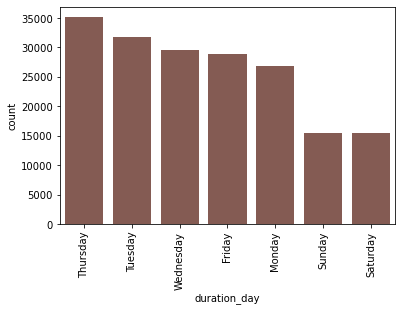

In [10]:
duration_day_counts = df_ford['duration_day'].value_counts()
duration_day_order = duration_day_counts.index
n_df_ford = df_ford.shape[0]
max_duration_day_counts = duration_day_counts[0]
max_duration_day_prop = duration_day_counts / n_df_ford
sb.countplot(data=df_ford, x='duration_day', color = sb.color_palette()[5],
            order = (duration_day_order));

plt.xticks(rotation=90)

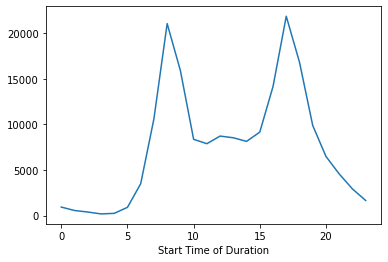

In [11]:
time = df_ford.duration_hour.value_counts().sort_index().plot(kind = 'line').set(xlabel = 'Start Time of Duration')

People tend to rent a bike mostly on Thursdays, and a peak hours.

## How long does the average trip take?

(0.0, 100.0)

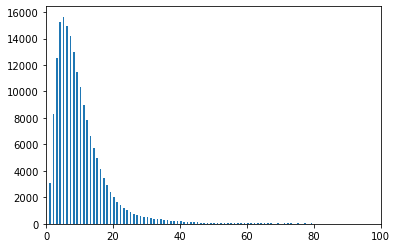

In [12]:
bins = np.arange(0, df_ford['duration_minutes'].max()+0.5, 0.5)
plt.hist(data = df_ford, x= 'duration_minutes', bins = bins);
plt.xlim(0,100)

In [13]:
df_ford['duration_minutes'].mean()

11.614632682021613

The histogram above shows that people generally rent bikes for between 5 and 15 minutes. Statistically it is in average 11.61.

## What is the portion of subscribers?

(-1.1064012734599673,
 1.10592712572021,
 -1.1011334494182654,
 1.1111949497619118)

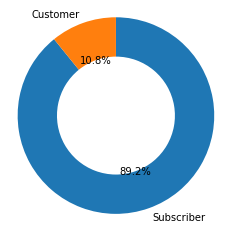

In [14]:
sorted_counts = df_ford['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

The pie chart shows the distribution of user types above as 89% of users are subscribes.

## What is the gender distribution for renting GoBikes?

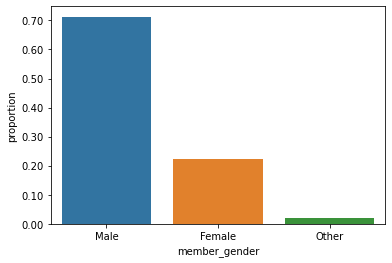

In [16]:
gender_counts = df_ford['member_gender'].value_counts()
gender_order = gender_counts.index
n_df_ford = df_ford.shape[0]
male_counts = gender_counts[0]
male_prop = male_counts / n_df_ford
female_counts = gender_counts[1]
female_prop = female_counts / n_df_ford
tick_props = np.arange(0, male_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sb.countplot(data = df_ford, x='member_gender',order=gender_order);
plt.yticks(tick_props * n_df_ford, tick_names)
plt.ylabel('proportion');

The plot shows that male proportion is 71%, female proportion is %22 and other proportion is approximately %0.07.

## What age group rides bikes the most?

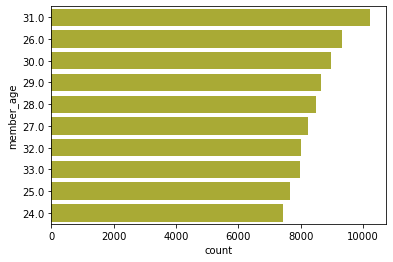

In [19]:
member_age_order = df_ford['member_age'].value_counts().head(10)
sb.countplot(data = df_ford, y = 'member_age', color = sb.color_palette()[8],
             order = (member_age_order.index));

The plot displayes the most ten frequent ages of users. According to the data, people between 24 and 31 tend to bikes mostly, and the most frequent age is 31.

## Is there any relation between user type and starting hour of duration?

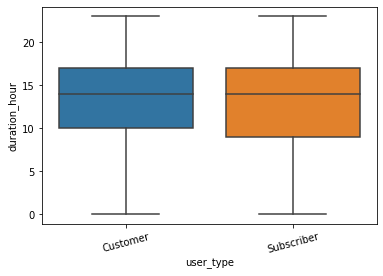

In [23]:
sb.boxplot(data= df_ford, x='user_type', y='duration_hour');
plt.xticks(rotation = 15);

First quartile(minimum) starting hour of duration for subscribers is earlier then customers. Their medians and maxs are approximately equal. 
Subscribers rent in a more wide of range in a day, as starting to rent earlier. Assuming that it is probably the time for going to office.

## Is there any relation between gender, the day of duration and user type?

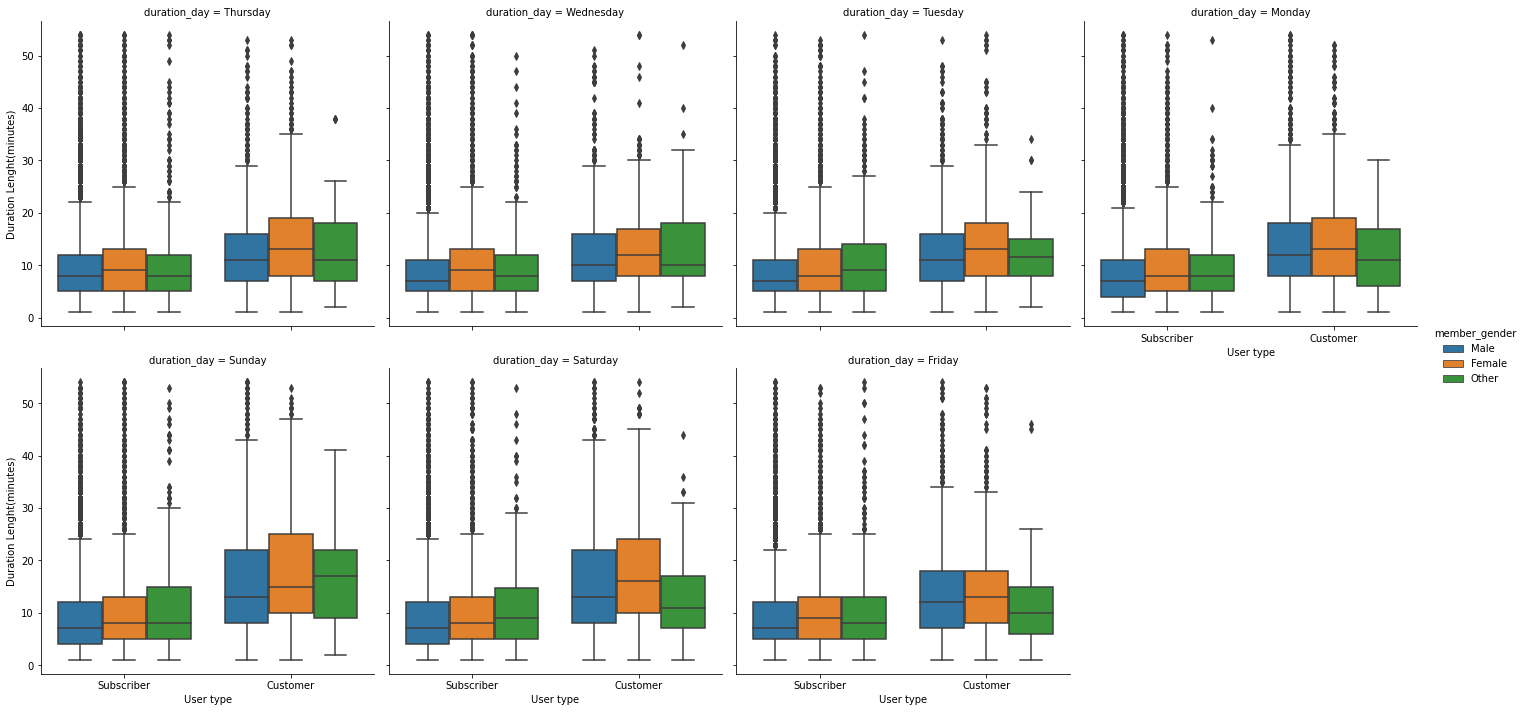

In [20]:
duration_day_counts = df_ford['duration_day'].value_counts()
duration_day_order = duration_day_counts.index
d = sb.factorplot(x="user_type", y="duration_minutes", col = "duration_day",hue="member_gender",col_wrap=4, kind="box",
                  data=df_ford.query('duration_minutes < 55'))
d.set_xlabels('User type')
d.set_ylabels('Duration Lenght(minutes)')
plt.show()

From the week-day comparison visualization plot based on user_type and duration lenght represents a trend for both customer males and females, that are tend to ride longer minutes on the the weekend. 

## Is there any relation between user type, duration length?

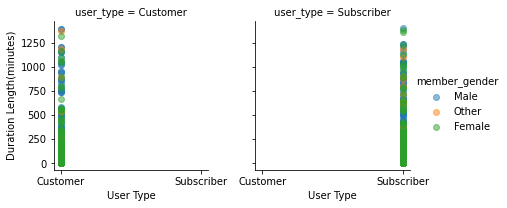

In [22]:
m = sb.FacetGrid(data=df_ford ,col = 'user_type' , hue = 'member_gender')
m.map(plt.scatter , 'user_type','duration_minutes' , alpha = 0.5).add_legend()
m.set_xlabels('User Type')
m.set_ylabels('Duration Length(minutes)')
m.set_xticklabels()
plt.show()

The scatter plot shows that female tends to have longer minutes biking than males. Also, subscriber females have longer trips than customer females. Customer females prefer to have less longer trips than customer males.